In [8]:
#let's first import some of the libraries we need. we'll import anything else we need later.
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [9]:
#now let's import our file and see what we got.
data = pd.read_csv("houses.csv")

In [10]:
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [11]:
data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [12]:
data.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [13]:
#our data should be clean and we shouldn't need to do any preprocessing
#features we're gonna try:
#bedrooms, bathrooms, sqft_living, sqft_lot, floors, condition, grade, yr_built.
#here's how i selected them:
#i first created a data correlation map of our dataset (file included).
#then, i dropped some features that have very strong correlation with other features. 
#(for example i dropped sqft_above since its very similar to sqft_living.)(by drop i mean i'm not gonna use said feature.)
#now, let's create a function that will make a scatterplot containing some feature in the x-axis and our target in the y-axis.
#this function will also show the correlation coefficient between said feature and our target.
#we'll use it to select our features.

In [14]:
def viz(v):
    sns.scatterplot(x = data[v], y=data["price"])
    print("Correlation coefficient:")
    print(data["price"].corr(data[v]))

Correlation coefficient:
0.3083495981456382


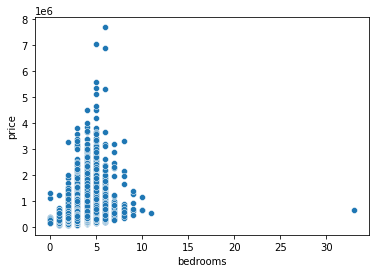

In [15]:
viz("bedrooms")
#correlation not strong, drop.

Correlation coefficient:
0.5251375054139615


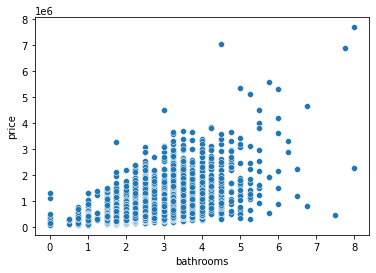

In [16]:
viz("bathrooms")
#correlation not bad, keep.

Correlation coefficient:
0.7020350546118004


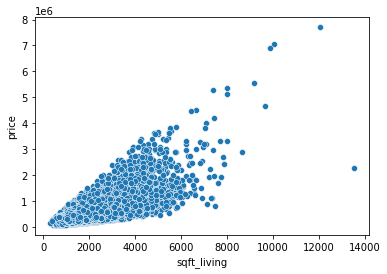

In [17]:
viz("sqft_living")
#correlation very strong, keep.

Correlation coefficient:
0.08966086058710013


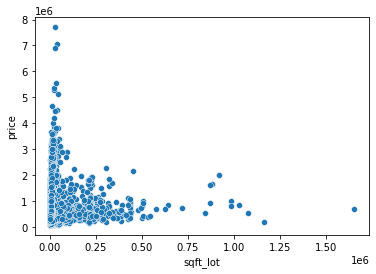

In [18]:
viz("sqft_lot")
#correlation very bad, drop.

Correlation coefficient:
0.25679388755071847


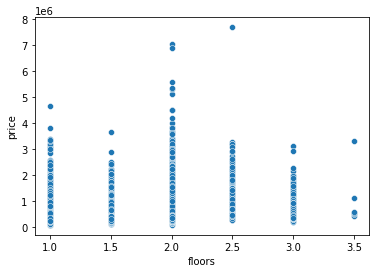

In [19]:
viz("floors")
#correlation very bad, drop.

Correlation coefficient:
0.0363617891289975


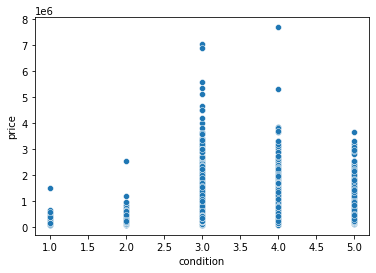

In [20]:
viz("condition")
#correlation very bad, drop.

Correlation coefficient:
0.6674342560202366


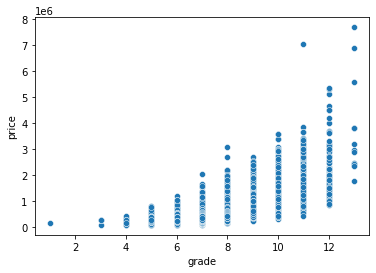

In [21]:
viz("grade")
#correlation pretty good, keep.

Correlation coefficient:
0.05401153149479271


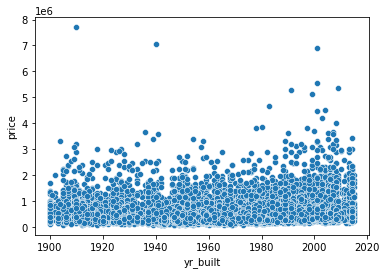

In [22]:
viz("yr_built")
#correlation very bad, drop.

In [23]:
#the features we are now left with are:
#bathrooms, sqft_living, grade.

In [24]:
#let's try linear regression on each of these features:
#we're gonna make a function that does a number of things:
#it takes in a feature as a parameter then, it splits the dataset into training and testing data, then, it trains the model.
#the function then tests the model's performance and shows its mse and R-squared, it also visualizes the regression line 
#against the actual data.
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn import metrics
def linreg(ftr):
    y = data["price"]
    x = data[ftr]
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 100)
    LR = LinearRegression()
    LR.fit(x_train.values.reshape(-1,1), y_train)
    prediction = LR.predict(x_test.values.reshape(-1, 1))
    plt.plot(x_test, prediction, label="Regression Model", color = "b")
    plt.scatter(x_test, y_test, label="Real Test Data", color='g', alpha=.5)
    plt.legend()
    plt.show()
    print("MSE = ", mean_squared_error(y_test,prediction))
    print("R squared = ", metrics.r2_score(y_test,prediction))

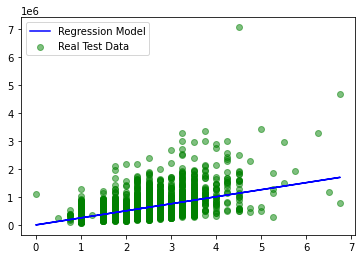

MSE =  98664973732.9254
R squared =  0.26789619118018204


In [25]:
linreg("bathrooms")

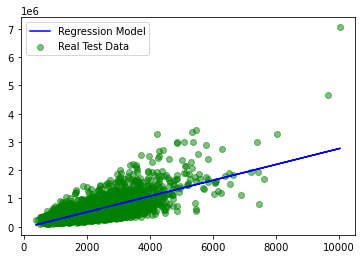

MSE =  65286065304.15618
R squared =  0.5155709745445147


In [26]:
#we can see the linear regression did not do well for the bathrooms feature.
#let's try it on the next feature.
linreg("sqft_living")

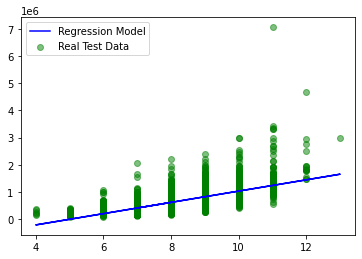

MSE =  74824668894.49683
R squared =  0.44479359778046057


In [27]:
#we can clearly see that linear regression did much better with this feature compared to to bathrooms.
#but it's still not good enough.
#let's try the next feature.
linreg("grade")

In [28]:
#we can again see that it did not work that well with this variable either but still better than bathrooms.
#we can can conclude by saying Linear Regression did not go well.
#let's try multi-linear regression
y = data["price"].values
x = data[["bathrooms","sqft_living","grade"]]

In [29]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 40)
MLR = LinearRegression()
MLR.fit(x_train, y_train)
prediction = MLR.predict(x_test)
print("MSE = ", mean_squared_error(y_test,prediction))
print("R squared = ", metrics.r2_score(y_test,prediction))

MSE =  56851849102.88927
R squared =  0.5480685369642899


In [30]:
#we can see that multi-linear regression is a tiny little bit better than linear regression.
#but again, it's still not good enough.
#let's try polynomial regression
from sklearn.preprocessing import PolynomialFeatures 

In [51]:
y = data["price"].values
x = data[["bathrooms","sqft_living","grade"]]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.35, random_state=40)
lr = LinearRegression()
poly=PolynomialFeatures(degree=2)
x_train_fit = poly.fit_transform(x_train)
lr.fit(x_train_fit, y_train)
x_test_fit = poly.fit_transform(x_test)
prediction = lr.predict(x_test_fit)
print("MSE = ", mean_squared_error(y_test,prediction))
print("R squared = ", metrics.r2_score(y_test,prediction))

MSE =  50331478843.83707
R squared =  0.5996462976362928


In [52]:
#we can see that our results are improving but they're still not good enough.
#my guess would be that it's because of outliers causing disturbances in our models.